# 多层感知器 MLP

1960年代，Frank Rosenblatt提出的单层感知器（Perceptron）曾掀起人工智能的第一次浪潮，但其线性本质很快暴露出致命缺陷。

1969年，Minsky和Papert在《Perceptrons》中数学证明了单层结构的局限：

感知器模型无法处理任何非线性可分问题，如同二维平面上的探险家永远无法绕过环形迷宫。--这一结论直接导致神经网络研究陷入长达十余年的寒冬。

1986年，Rumelhart等人通过反向传播算法实现突破：

- 在输入层与输出层之间插入隐藏层，构建多层前馈网络
- 引入非线性激活函数（如Sigmoid），使决策边界可弯曲折叠
- 链式求导法则打通了深层参数更新的路径，让误差信号能穿透各层

反向传播算法的成功证明了深度网络可以通过梯度下降优化，从此神经网络进入架构设计时代。

接下来我们会举例一个典型的非线性可分数据集并使用多层感知器将其分类

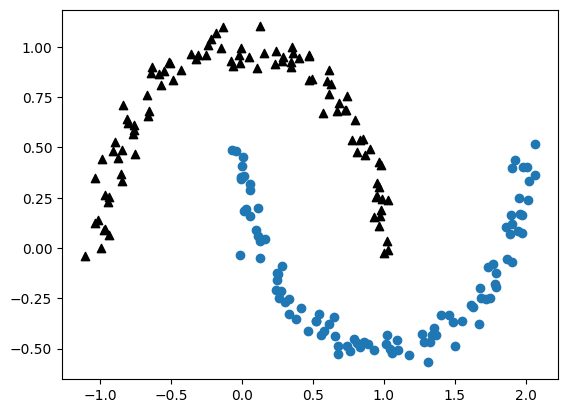

In [1]:
import torch
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

data = make_moons(200, noise=0.05)
x = torch.tensor(data[0], dtype=torch.float)
y = torch.tensor(data[1], dtype=torch.long)


def draw_data(x: torch.Tensor, y: torch.Tensor):
    label1 = x[y > 0]
    plt.scatter(label1[:, 0], label1[:, 1], marker="o")
    label0 = x[y == 0]
    plt.scatter(label0[:, 0], label0[:, 1], marker="^", color="k")


draw_data(x, y)

plt.show()

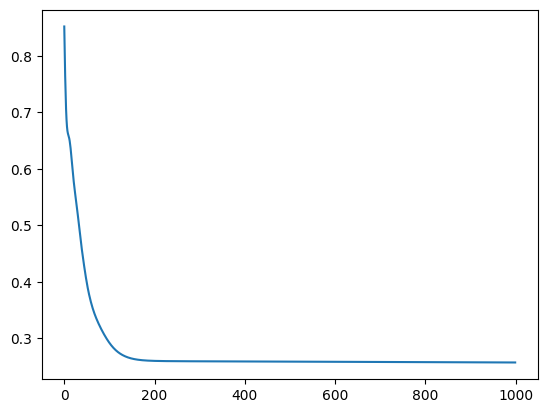

In [2]:
# 使用感知器模型永远无法将上图数据区分开。

class MTP(torch.nn.Module):
    """
    定义一个感知器模型，为了体会多层感知器效果我们使这个模型只包含一个隐藏层
    """

    def __init__(self):
        super().__init__()
        self.ln1 = torch.nn.Linear(2, 16)
        self.ln2 = torch.nn.Linear(16, 2)

    def forward(self, inputs: torch.Tensor):
        outputs = self.ln1(inputs)
        outputs = torch.sigmoid(outputs)
        outputs = self.ln2(outputs)
        return outputs


# 训练参数
eval_iters = 1000
learning_rate = 0.01

model = MTP()

lossi = []
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for _ in range(eval_iters):
    y_pred = model(x)
    loss = torch.nn.functional.cross_entropy(y_pred, y)
    lossi.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(lossi)
plt.show()

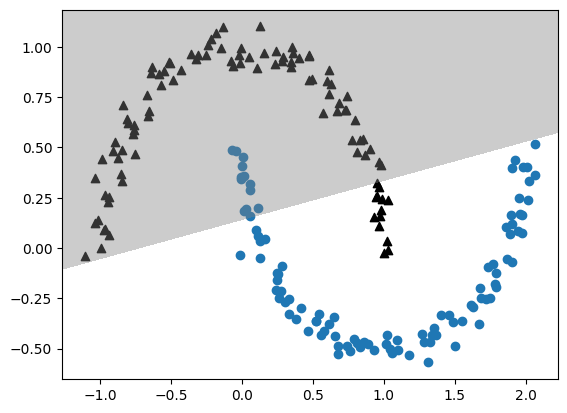

In [3]:
def draw_model(model):
    '''展示模型决策边界'''
    ax = plt.gca()
    x1 = torch.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    x2 = torch.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)
    x1, x2 = torch.meshgrid(x1, x2, indexing="ij")
    y = torch.softmax(model(torch.stack([x1.ravel(), x2.ravel()], dim=1)), dim=-1)[:, 1]
    y = y.reshape(x1.shape).detach().numpy()
    plt.contourf(x1, x2, y, levels=[0, 0.5], colors=["gray"], alpha=0.4)


draw_data(x, y)
draw_model(model)
plt.show()

# MLP 的结构改进

隐藏层（Hidden Layers）
- 单层感知器：输入层 → 输出层
- 多层感知器：输入层 → 隐藏层（可多层） → 输出层
    
多层感知器每层将来自前层的输入提取出 H 长度的隐藏状态，再输出给下一层，人们直观的感受到越深层的隐藏状态越是输入数据更高维度的抽象。

多层感知器的提出深刻影响了神经网络的发展方向，其核心贡献在于证明了“层次化堆叠”能够赋予模型更强的表达能力。

**直接启示了**神经网络领域设计模型堆叠结构的现代深度学习的架构设计思想

# 一些激活函数

激活函数赋予了模型非线性能力，此外还有设计内外的各种作用。在设计模型结构式往往要尝试一些不同的激活函数（包括自己实现激活函数）测试收敛效果（

控制神经元输出范围,起到归一化作用 -- 例如 Sigmoid 放大大值，缩小小值。

决定神经元激活状态 --例如 ReLU “稀疏激活”特性（负输入直接输出0），提升计算效率。

影响梯度传播。 --例如 tanh 放大了靠近 0 时的梯度

目前最流行的激活函数是 ReLU

下面是一些激活函数的图像

Text(0.5, 1.0, 'y = x')

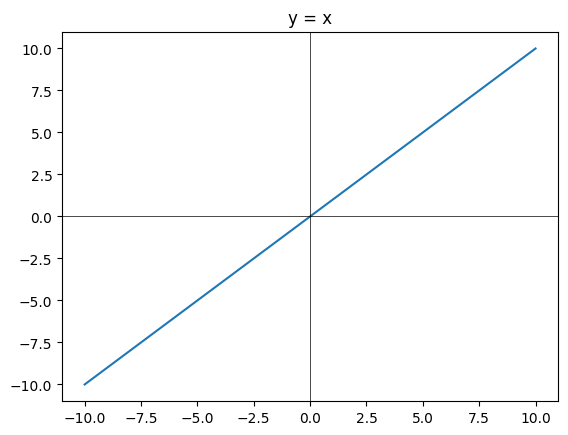

In [4]:
import torch
import matplotlib.pyplot as plt

i = torch.linspace(-10, 10, 201)

plt.plot(i, i)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = x")

Text(0.5, 1.0, 'y = relu(x)')

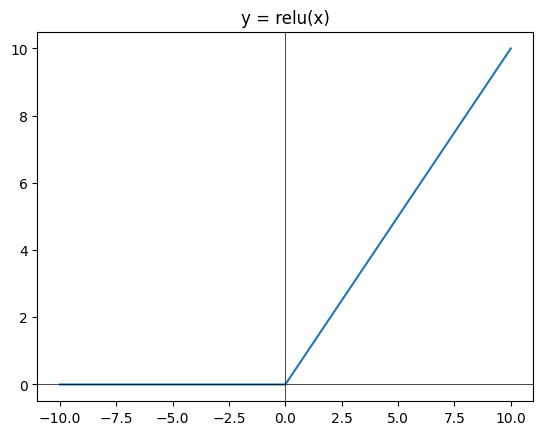

In [5]:
plt.plot(i, torch.relu(i))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = relu(x)")

Text(0.5, 1.0, 'y = sigmoid(x)')

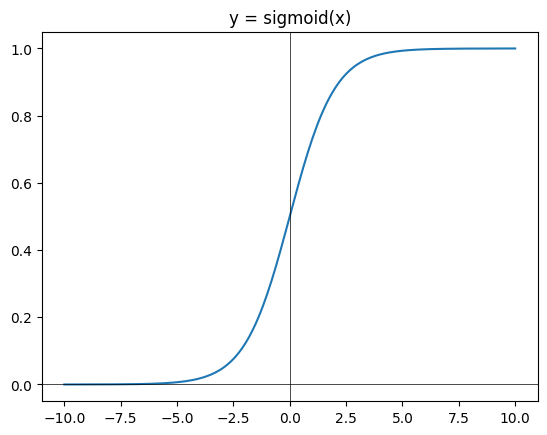

In [6]:
plt.plot(i, torch.sigmoid(i))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = sigmoid(x)")

Text(0.5, 1.0, 'y = tanh(x)')

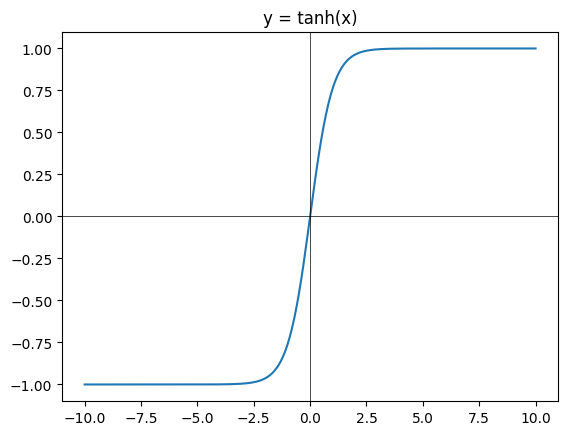

In [7]:
plt.plot(i, torch.tanh(i))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = tanh(x)")

Text(0.5, 1.0, 'y = rrelu(x)')

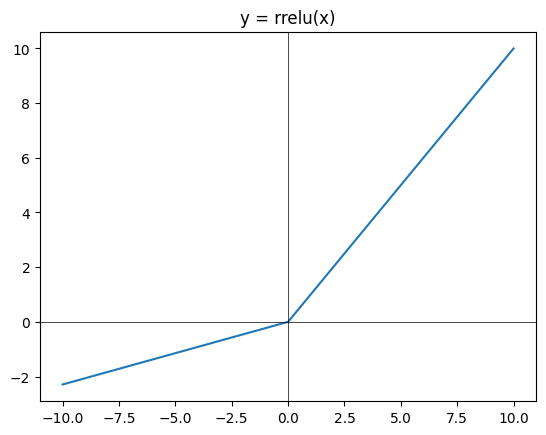

In [8]:
plt.plot(i, torch.rrelu(i))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = rrelu(x)")

Text(0.5, 1.0, 'y = gelu(x)')

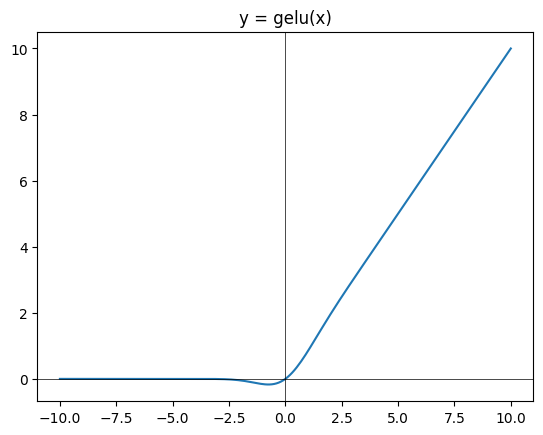

In [9]:
plt.plot(i, torch.nn.functional.gelu(i))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("y = gelu(x)")